In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-08-15 12:13:49.662005


<h2>Dataframe matplotlib-grafiikaksi - perusasiat</h2>

<ul><li>Jos teen kaavion suoraan dataframesta (df.plot...), niin käytän pandas-kirjastoon matplotlibin pohjalta rakennettua "viritelmää" kaavion teosta.
    <br>Lue lisää <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html" target="_blank">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html</a></li>
<li>matplotlib.pyplot sisältää komentoja kaavion muotoiluun. Aivan kaikkea näillä komennoilla ei saa tehtyä. 
    <br>Lue lisää <a href="https://matplotlib.org/tutorials/introductory/pyplot.html" target="_blank">https://matplotlib.org/tutorials/introductory/pyplot.html</a> ja <a href="https://matplotlib.org/api/pyplot_summary.html" target="_blank">https://matplotlib.org/api/pyplot_summary.html</a></li>
    <li>Vannoutuneet olio-ohjelmoijat käyttävät mieluummin kaavion luonnin palauttamaa <b>Axes</b>-luokan oliota kaavion muotoiluun.
    <br>Lue lisää <a href="https://matplotlib.org/api/axes_api.html" target="_blank">https://matplotlib.org/api/axes_api.html</a></li></ul>
    
Seuraavassa teen kaaviot suoraan dataframesta ja käytän muotoiluun matplot.pyplot-komentoja (plt...).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Luon dataframen
df1 = pd.DataFrame({'Myynti 2017': [1321847, 852669, 1032199, 568230]},
                  index = ['Helsinki', 'Turku', 'Tampere', 'Oulu'])
df1

,Myynti 2017
Helsinki,1321847
Turku,852669
Tampere,1032199
Oulu,568230


<h3>Dataframesta kaavioksi</h3>

- <b>df.plot()</b> luo oletuksena viivakaavion
- Pystypylväskaavio: <b>df.plot.bar()</b>, vaakapylväskaavio: <b>df.plot.barh()</b>

<AxesSubplot:>

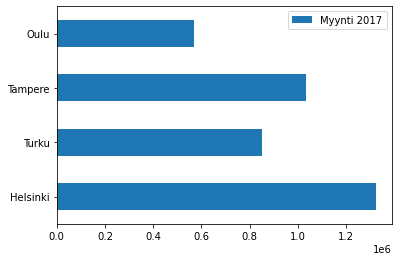

In [4]:
# Myynnit vaakapylväskaaviona
df1.plot.barh()

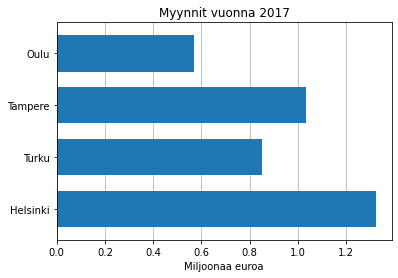

In [5]:
# Pientä tuunausta kaavion luonnin yhteyteen: 
# selite (legend) piiloon, pylvään leveyden (width) määritys, pylväät taustaviivoitusten yläpuolelle (zorder)
(df1 / 1000000).plot.barh(legend = False, width = 0.7, zorder = 2)

# Otsikoita
plt.title('Myynnit vuonna 2017')
plt.xlabel('Miljoonaa euroa')

# Taustaviivoitus x-akselin mukaan
plt.grid(axis = 'x')

In [6]:
# Teen uuden dataframen
df2 = pd.DataFrame({'Myynti 2017': [1321847, 852669, 1032199, 568230],
       'Myynti 2016': [1203434, 923450, 1023563, 542399]},
       index = ['Helsinki', 'Turku', 'Tampere', 'Oulu'])
df2

,Myynti 2017,Myynti 2016
Helsinki,1321847,1203434
Turku,852669,923450
Tampere,1032199,1023563
Oulu,568230,542399


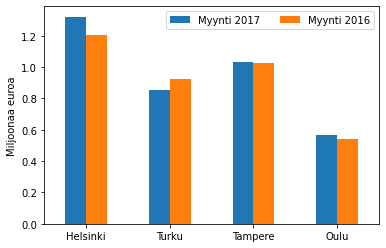

In [7]:
# Luokka-akselin nimiöiden asennon säätö (rot=0)
(df2 / 1000000).plot.bar(rot = 0)

# y-akselin otsikko
plt.ylabel('Miljoonaa euroa')

# Selitteeseen 2 saraketta (2 selitettä vierekkäin)
plt.legend(ncol = 2)

Text(0, 0.5, 'Miljoonaa euroa')

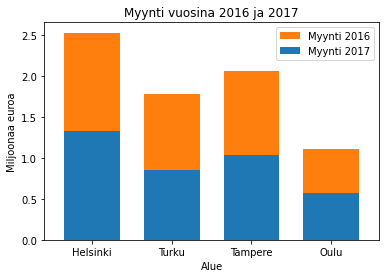

In [8]:
# legend='reverse' kääntää selitteen järjestyksen
# rot = 0 määrittää luokka-akselin nimiöiden asennon
# stacked = True pinoaa pylväät päällekkäin
# width = 0.7 määrittää pylväiden leveyden (enintään 1)

(df2 / 1000000).plot.bar(legend = 'reverse', rot = 0, stacked = True, width = 0.7)

# Otsikoinnit
plt.title('Myynti vuosina 2016 ja 2017')
plt.xlabel('Alue')
plt.ylabel('Miljoonaa euroa')

In [9]:
# Teen uuden dataframen
df3 = pd.DataFrame({'Mies' : [17, 15, 6],'Nainen' : [8, 15, 21]},
                  index = ['Tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 'Tyytyväinen'])
df3

,Mies,Nainen
Tyytymätön,17,8
Ei tyytymätön eikä tyytyväinen,15,15
Tyytyväinen,6,21


<AxesSubplot:>

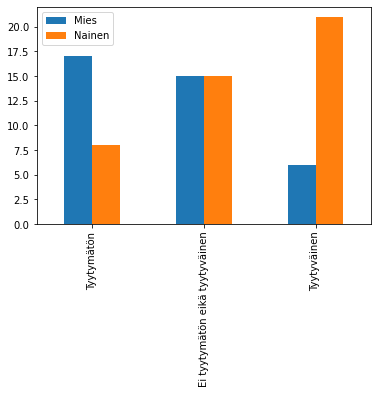

In [10]:
# Kaavio ilman tuunausta
df3.plot.bar()

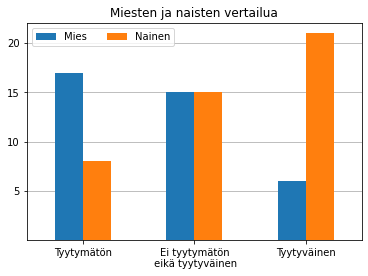

In [11]:
# Luokka-akselin nimiöiden kääntö (rot) ja pylväät taustaviivoituksen päälle (zorder)
df3.plot.bar(rot = 0, zorder = 2)

plt.title('Miesten ja naisten vertailua')

# Asetan y-akselin jakoviivat
plt.yticks([5, 10, 15, 20])

# y-akselin mukainen taustaviivoitus
plt.grid(axis = 'y')

# Selite kahteen sarakkeeseen
plt.legend(ncol = 2)

# Määrittelen luokka-akselin nimiöt, jotta voin lisätä rivinvaihdon (\n) haluamaani kohtaan
plt.xticks([0, 1, 2], ['Tyytymätön', 'Ei tyytymätön\n eikä tyytyväinen', 'Tyytyväinen'])

# Tallennan kaavion tai tarkkaan ottaen tallenna kuvion (figure), jonka sisällä kaavio on
# Kuvioon (figure) pääsen käsiksi plt.gcf() -funktiolla (get current figure)
# Ilman parametria bbox_inches = 'tight' kuvion reunoilta voi jäädä osia tallentumatta
plt.gcf().savefig('testi.png', bbox_inches = 'tight')

In [12]:
# Tällä selvitän tarjolla olevat kaavion tallennusmuodot
plt.figure().canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

<h3>Usean kaavion kuviot</h3>

- Kaavio (<b>Axes</b>-olio) on aina <b>figure</b> (kuvio) -olion sisällä. 
- <b>Figure</b>-olion sisään voin sijoittaa useita kaavioita <b>plt.subplots</b>-toiminnolla
- <b>plt.subplots</b> palauttaa <b>figure</b>-olion ja kokoelman <b>Axes</b>-olioita.

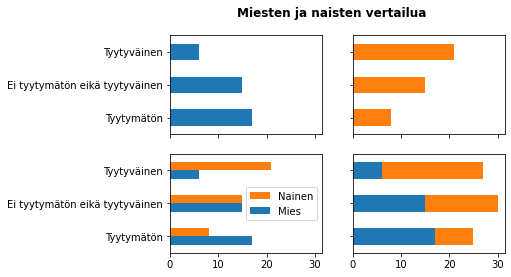

In [13]:
# 2x2 kaaviomatriisi
# sharex- ja sharey-lisäparametreilla asetan kaavioille yhteiset akselit
fig, ax = plt.subplots(2, 2, sharex = True, sharey = True)

# Kuvion (figure) otsikko
fig.suptitle('Miesten ja naisten vertailua', fontsize = 12, fontweight = 'bold')

# Vasemman yläkulman kaavio
df3['Mies'].plot.barh(ax = ax[0,0])

# Oikean yläkulman kaavio; värinä väripaletin toinen väri (C1)
df3['Nainen'].plot.barh(color = 'C1', ax = ax[0, 1])

# Vasemman alakulman kaavio
df3.plot.barh(legend = 'reverse', ax = ax[1, 0])

# Oikean alakulman kaavio
df3.plot.barh(legend = False, stacked = True, ax = ax[1, 1])

# Tallennan kuvion
# Ilman lisäparametria bbox_inches='tight' kuvion reunoilta voi jäädä osia tallentumatta
fig.savefig('testi2.png', bbox_inches = 'tight')

<h3>Valmiit tyylit</h3>

Valmista tyyliä käyttämällä saat nopeasti tuunattua grafiikan ulkoasua.

Tyylin voit ottaa käyttöön komennolla <b>plt.style.use('tyylin nimi')</b>

In [14]:
# Tarjolla olevien tyylien listaus
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Text(0.5, 0, 'Miljoonaa euroa')

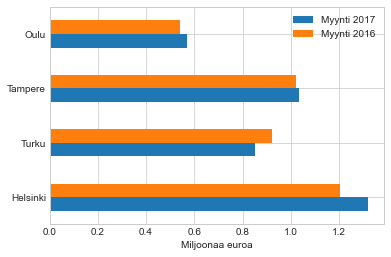

In [15]:
# Esimerkkinä seaborn-whitegrid -tyyli
plt.style.use('seaborn-whitegrid')

(df2 / 1000000).plot.barh()

plt.xlabel('Miljoonaa euroa')

<h2>Lisätietoa</h2>

Osaat paljon enemmän, jos käyt läpi seitsemänosaisen notebook-sarjani matplotlibin perusteista. Aloita tästä:

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib1.ipynb